In [361]:
# for mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import timedelta
import datetime as dt

# to supress warnings

import warnings
warnings.filterwarnings("ignore")

# Reading and Understanding the data

In [363]:
# reading the data using read_csv

m_df = pd.read_csv('/content/drive/MyDrive/H2HBABBA2121/ML/data.csv')
m_df

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U007,20027773,Stellar Supplies LLC,2019-12-19,2020.0,193479817.0,2019-05-15,20200304,20190213,20190928.0,CAD,RV,1.0,7453.44,2019-01-28,Escrow,193479817.0,0
1,CA02,20088977,NextWave Technologies,2020-02-04,2020.0,196318429.0,2020-04-08,20190319,20191128,20200223.0,CAD,RV,1.0,7677.32,2019-06-08,1/90 EOM,196318429.0,1
2,U007,20033508,Velocity Solutions,2019-01-17,2019.0,199991316.0,2019-06-30,20190308,20190801,20190620.0,USD,RV,1.0,672698.63,2019-08-30,N90,199991316.0,0
3,U007,20001083,Elite Systems Group,NaN,2020.0,194305136.0,2020-02-02,20190723,20190511,20200121.0,CAD,RV,1.0,7036.14,2019-05-02,1/90 EOM,194305136.0,0
4,CA02,20015251,Optimum Tech Partners,2019-06-25,2020.0,193656002.0,2019-12-28,20200218,20190611,20190920.0,CAD,RV,1.0,7206.11,2019-08-31,Deductible,193656002.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U007,20069131,Nexus Networks,NaN,2020.0,190916046.0,2019-08-02,20190306,20190207,20200508.0,CAD,RV,1.0,9772.48,2020-05-14,1/15 EOM,190916046.0,0
49996,U001,20087221,Pioneer Industries,2020-05-05,2020.0,191838263.0,2019-04-30,20190619,20190630,20200501.0,USD,RV,1.0,38094.66,2019-10-01,1/10 EOM,191838263.0,0
49997,U007,20008473,Quantum Dynamics,2019-10-09,2020.0,197321571.0,2019-08-28,20190128,20190625,20190821.0,CAD,RV,1.0,43063.46,2019-02-01,Weekly,197321571.0,1
49998,U001,20072988,Synergy Innovations,2019-10-09,2019.0,198220346.0,2020-01-31,20191213,20200406,20190212.0,CAD,RV,1.0,7931.53,2020-04-25,Escrow,198220346.0,0


In [364]:
# checking the sum of null values

m_df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                12500
business_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [365]:
# checking tyhe necessary details of the dataset

m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  int64  
 2   name_customer           50000 non-null  object 
 3   clear_date              37500 non-null  object 
 4   business_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [366]:
# conversion using pd.to_datetime

m_df['clear_date'] = pd.to_datetime(m_df['clear_date'])
m_df['posting_date'] = pd.to_datetime(m_df['posting_date'])
m_df['document_create_date'] = pd.to_datetime(m_df['document_create_date'], format = '%Y%m%d') # format is year,month,date
m_df['document_create_date.1'] = pd.to_datetime(m_df['document_create_date.1'], format = '%Y%m%d')
m_df['due_in_date'] = pd.to_datetime(m_df['due_in_date'], format = '%Y%m%d')
m_df['baseline_create_date'] = pd.to_datetime(m_df['baseline_create_date'])

In [367]:
# checking necessary information

m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  int64         
 2   name_customer           50000 non-null  object        
 3   clear_date              37500 non-null  datetime64[ns]
 4   business_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

# Calculating the Delay

In [368]:
# just subtracting due in date from clear date

delay = m_df['clear_date'] - m_df['due_in_date']
m_df['Delay'] = delay

In [369]:
# checking necessary information about the dataset

m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           50000 non-null  object         
 1   cust_number             50000 non-null  int64          
 2   name_customer           50000 non-null  object         
 3   clear_date              37500 non-null  datetime64[ns] 
 4   business_year           50000 non-null  float64        
 5   doc_id                  50000 non-null  float64        
 6   posting_date            50000 non-null  datetime64[ns] 
 7   document_create_date    50000 non-null  datetime64[ns] 
 8   document_create_date.1  50000 non-null  datetime64[ns] 
 9   due_in_date             50000 non-null  datetime64[ns] 
 10  invoice_currency        50000 non-null  object         
 11  document type           50000 non-null  object         
 12  posting_id              50000 no

In [370]:
# extracting the day value from the delay feature

m_df['Delay'] = m_df['Delay'].dt.days
m_df

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U007,20027773,Stellar Supplies LLC,2019-12-19,2020.0,193479817.0,2019-05-15,2020-03-04,2019-02-13,2019-09-28,CAD,RV,1.0,7453.44,2019-01-28,Escrow,193479817.0,0,82.0
1,CA02,20088977,NextWave Technologies,2020-02-04,2020.0,196318429.0,2020-04-08,2019-03-19,2019-11-28,2020-02-23,CAD,RV,1.0,7677.32,2019-06-08,1/90 EOM,196318429.0,1,-19.0
2,U007,20033508,Velocity Solutions,2019-01-17,2019.0,199991316.0,2019-06-30,2019-03-08,2019-08-01,2019-06-20,USD,RV,1.0,672698.63,2019-08-30,N90,199991316.0,0,-154.0
3,U007,20001083,Elite Systems Group,NaT,2020.0,194305136.0,2020-02-02,2019-07-23,2019-05-11,2020-01-21,CAD,RV,1.0,7036.14,2019-05-02,1/90 EOM,194305136.0,0,NaN
4,CA02,20015251,Optimum Tech Partners,2019-06-25,2020.0,193656002.0,2019-12-28,2020-02-18,2019-06-11,2019-09-20,CAD,RV,1.0,7206.11,2019-08-31,Deductible,193656002.0,1,-87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U007,20069131,Nexus Networks,NaT,2020.0,190916046.0,2019-08-02,2019-03-06,2019-02-07,2020-05-08,CAD,RV,1.0,9772.48,2020-05-14,1/15 EOM,190916046.0,0,NaN
49996,U001,20087221,Pioneer Industries,2020-05-05,2020.0,191838263.0,2019-04-30,2019-06-19,2019-06-30,2020-05-01,USD,RV,1.0,38094.66,2019-10-01,1/10 EOM,191838263.0,0,4.0
49997,U007,20008473,Quantum Dynamics,2019-10-09,2020.0,197321571.0,2019-08-28,2019-01-28,2019-06-25,2019-08-21,CAD,RV,1.0,43063.46,2019-02-01,Weekly,197321571.0,1,49.0
49998,U001,20072988,Synergy Innovations,2019-10-09,2019.0,198220346.0,2020-01-31,2019-12-13,2020-04-06,2019-02-12,CAD,RV,1.0,7931.53,2020-04-25,Escrow,198220346.0,0,239.0


In [371]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  int64         
 2   name_customer           50000 non-null  object        
 3   clear_date              37500 non-null  datetime64[ns]
 4   business_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

# Dividing the dataset in the basis of clearing date

In [372]:
# dividing the whole dataset into m_train and m_test

m_train = m_df[m_df['clear_date'].isnull()==False]
m_test = m_df[m_df['clear_date'].isnull()]

In [373]:
# checking the size of the datasets using .shape

m_train.shape, m_test.shape

((37500, 19), (12500, 19))

# Data Preprocessing

In [374]:
# checking the count of null values

m_train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
business_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
Delay                     0
dtype: int64

In [375]:
# checking the unique values in the train set

m_train.nunique()

business_code                 6
cust_number               31254
name_customer                50
clear_date                  494
business_year                 2
doc_id                    37430
posting_date                494
document_create_date        494
document_create_date.1      494
due_in_date                 494
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         37413
baseline_create_date        494
cust_payment_terms           69
invoice_id                37430
isOpen                        2
Delay                       976
dtype: int64

In [376]:
# removal of constant columns
# whose nunique() val =1

m_train.drop(labels = ['document type','posting_id','isOpen'], axis=1, inplace = True)

In [377]:
m_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 0 to 49998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           37500 non-null  object        
 1   cust_number             37500 non-null  int64         
 2   name_customer           37500 non-null  object        
 3   clear_date              37500 non-null  datetime64[ns]
 4   business_year           37500 non-null  float64       
 5   doc_id                  37500 non-null  float64       
 6   posting_date            37500 non-null  datetime64[ns]
 7   document_create_date    37500 non-null  datetime64[ns]
 8   document_create_date.1  37500 non-null  datetime64[ns]
 9   due_in_date             37500 non-null  datetime64[ns]
 10  invoice_currency        37500 non-null  object        
 11  total_open_amount       37500 non-null  float64       
 12  baseline_create_date    37500 non-null  datetime64[

In [378]:
# value counts for features having unique values<10

for col in m_train.columns:
    if m_train[col].nunique()<10:
        print(m_train[col].value_counts())

business_code
U007    6368
U005    6258
U002    6256
U001    6242
CA02    6226
U013    6150
Name: count, dtype: int64
business_year
2019.0    18819
2020.0    18681
Name: count, dtype: int64
invoice_currency
CAD    18852
USD    18648
Name: count, dtype: int64


In [379]:
# grouping the low value_counts of business_code

m_train['business_code'] = np.where(m_train['business_code'].isin(['U007','U005']), 'Combined b_codes', m_train['business_code'])

In [380]:
# transpose of the main train set

m_train_t = m_train.T
m_train_t

,0,1,2,4,5,6,8,9,10,12,...,49986,49988,49989,49990,49992,49993,49994,49996,49997,49998
business_code,Combined b_codes,CA02,Combined b_codes,CA02,U002,Combined b_codes,U001,CA02,Combined b_codes,U013,...,U013,Combined b_codes,CA02,U013,U002,U001,U001,U001,Combined b_codes,U001
cust_number,20027773,20088977,20033508,20015251,20049047,20023556,20097856,20010679,20059310,20085832,...,20016193,20082041,20032750,20069574,20038249,20028522,20005681,20087221,20008473,20072988
name_customer,Stellar Supplies LLC,NextWave Technologies,Velocity Solutions,Optimum Tech Partners,Pioneer Industries,Pinnacle Manufacturing,Fusion Enterprises,Nexus Networks,Dynamic Industries,Crest Business Services,...,Fusion Enterprises,Alliance Enterprises,Elite Systems Group,InnovaTech Group,Prime Innovations,Cortex Innovations,Vanguard Ventures,Pioneer Industries,Quantum Dynamics,Synergy Innovations
clear_date,2019-12-19 00:00:00,2020-02-04 00:00:00,2019-01-17 00:00:00,2019-06-25 00:00:00,2020-02-10 00:00:00,2019-12-16 00:00:00,2020-04-15 00:00:00,2019-01-15 00:00:00,2019-07-29 00:00:00,2019-05-16 00:00:00,...,2019-03-29 00:00:00,2020-01-09 00:00:00,2019-02-05 00:00:00,2019-04-28 00:00:00,2020-01-24 00:00:00,2019-01-28 00:00:00,2020-05-12 00:00:00,2020-05-05 00:00:00,2019-10-09 00:00:00,2019-10-09 00:00:00
business_year,2020.0,2020.0,2019.0,2020.0,2019.0,2020.0,2020.0,2020.0,2020.0,2019.0,...,2020.0,2020.0,2019.0,2019.0,2020.0,2020.0,2019.0,2020.0,2020.0,2019.0
doc_id,193479817.0,196318429.0,199991316.0,193656002.0,193846040.0,198307970.0,197876761.0,198554663.0,197746714.0,194049757.0,...,195245714.0,191427766.0,193180396.0,194164873.0,195824560.0,191134460.0,191635131.0,191838263.0,197321571.0,198220346.0
posting_date,2019-05-15 00:00:00,2020-04-08 00:00:00,2019-06-30 00:00:00,2019-12-28 00:00:00,2020-01-21 00:00:00,2019-01-14 00:00:00,2019-05-05 00:00:00,2019-11-19 00:00:00,2020-03-09 00:00:00,2019-09-13 00:00:00,...,2020-05-04 00:00:00,2019-10-22 00:00:00,2019-02-26 00:00:00,2019-11-19 00:00:00,2019-05-09 00:00:00,2019-11-17 00:00:00,2019-12-03 00:00:00,2019-04-30 00:00:00,2019-08-28 00:00:00,2020-01-31 00:00:00
document_create_date,2020-03-04 00:00:00,2019-03-19 00:00:00,2019-03-08 00:00:00,2020-02-18 00:00:00,2019-09-07 00:00:00,2019-11-26 00:00:00,2019-09-02 00:00:00,2019-09-14 00:00:00,2019-11-09 00:00:00,2019-02-28 00:00:00,...,2019-10-24 00:00:00,2019-07-23 00:00:00,2019-07-29 00:00:00,2019-12-11 00:00:00,2019-11-15 00:00:00,2019-03-25 00:00:00,2019-01-11 00:00:00,2019-06-19 00:00:00,2019-01-28 00:00:00,2019-12-13 00:00:00
document_create_date.1,2019-02-13 00:00:00,2019-11-28 00:00:00,2019-08-01 00:00:00,2019-06-11 00:00:00,2019-08-28 00:00:00,2020-01-18 00:00:00,2020-03-23 00:00:00,2020-04-02 00:00:00,2019-04-29 00:00:00,2020-02-19 00:00:00,...,2019-09-26 00:00:00,2019-10-17 00:00:00,2019-12-18 00:00:00,2019-02-08 00:00:00,2019-01-12 00:00:00,2019-03-24 00:00:00,2019-07-28 00:00:00,2019-06-30 00:00:00,2019-06-25 00:00:00,2020-04-06 00:00:00
due_in_date,2019-09-28 00:00:00,2020-02-23 00:00:00,2019-06-20 00:00:00,2019-09-20 00:00:00,2019-11-15 00:00:00,2019-09-22 00:00:00,2019-07-11 00:00:00,2020-04-02 00:00:00,2020-03-27 00:00:00,2020-03-11 00:00:00,...,2019-08-23 00:00:00,2019-07-16 00:00:00,2019-09-15 00:00:00,2020-05-18 00:00:00,2019-02-10 00:00:00,2019-12-31 00:00:00,2019-05-23 00:00:00,2020-05-01 00:00:00,2019-08-21 00:00:00,2019-02-12 00:00:00


In [381]:
# checking all the duplicate values for transpose of the train set

m_train_t.duplicated().sum()

1

In [382]:
m_train_t[m_train_t.duplicated()]

,0,1,2,4,5,6,8,9,10,12,...,49986,49988,49989,49990,49992,49993,49994,49996,49997,49998
invoice_id,193479817.0,196318429.0,199991316.0,193656002.0,193846040.0,198307970.0,197876761.0,198554663.0,197746714.0,194049757.0,...,195245714.0,191427766.0,193180396.0,194164873.0,195824560.0,191134460.0,191635131.0,191838263.0,197321571.0,198220346.0


In [383]:
# dropping the duplicate features

m_train_f = m_train_t.drop_duplicates(keep='first').T
m_train_f = m_train_f.drop(['document_create_date.1'], axis = 1)

In [384]:
m_train_f

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,Combined b_codes,20027773,Stellar Supplies LLC,2019-12-19,2020.0,193479817.0,2019-05-15,2020-03-04,2019-09-28,CAD,7453.44,2019-01-28,Escrow,82.0
1,CA02,20088977,NextWave Technologies,2020-02-04,2020.0,196318429.0,2020-04-08,2019-03-19,2020-02-23,CAD,7677.32,2019-06-08,1/90 EOM,-19.0
2,Combined b_codes,20033508,Velocity Solutions,2019-01-17,2019.0,199991316.0,2019-06-30,2019-03-08,2019-06-20,USD,672698.63,2019-08-30,N90,-154.0
4,CA02,20015251,Optimum Tech Partners,2019-06-25,2020.0,193656002.0,2019-12-28,2020-02-18,2019-09-20,CAD,7206.11,2019-08-31,Deductible,-87.0
5,U002,20049047,Pioneer Industries,2020-02-10,2019.0,193846040.0,2020-01-21,2019-09-07,2019-11-15,USD,862895.81,2020-01-31,"2/10, Net 30",87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,20028522,Cortex Innovations,2019-01-28,2020.0,191134460.0,2019-11-17,2019-03-25,2019-12-31,USD,818569.9,2020-05-13,N30,-337.0
49994,U001,20005681,Vanguard Ventures,2020-05-12,2019.0,191635131.0,2019-12-03,2019-01-11,2019-05-23,USD,122448.19,2019-07-30,Quarterly,355.0
49996,U001,20087221,Pioneer Industries,2020-05-05,2020.0,191838263.0,2019-04-30,2019-06-19,2020-05-01,USD,38094.66,2019-10-01,1/10 EOM,4.0
49997,Combined b_codes,20008473,Quantum Dynamics,2019-10-09,2020.0,197321571.0,2019-08-28,2019-01-28,2019-08-21,CAD,43063.46,2019-02-01,Weekly,49.0


### Sorting on the basis of Posting date

In [385]:
# sorting the train dataset on the basis of posting date in ascending order

m_train_f.sort_values(by=["posting_date"], inplace=True)

In [386]:
# checking the minimum and maximum of the posting date

m_train_f.posting_date.min(), m_train_f.posting_date.max()

(Timestamp('2019-01-11 00:00:00'), Timestamp('2020-05-18 00:00:00'))

In [387]:
m_train_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 15745 to 31429
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         37500 non-null  object        
 1   cust_number           37500 non-null  object        
 2   name_customer         37500 non-null  object        
 3   clear_date            37500 non-null  datetime64[ns]
 4   business_year         37500 non-null  object        
 5   doc_id                37500 non-null  object        
 6   posting_date          37500 non-null  datetime64[ns]
 7   document_create_date  37500 non-null  datetime64[ns]
 8   due_in_date           37500 non-null  datetime64[ns]
 9   invoice_currency      37500 non-null  object        
 10  total_open_amount     37500 non-null  object        
 11  baseline_create_date  37500 non-null  datetime64[ns]
 12  cust_payment_terms    37500 non-null  object        
 13  Delay            

In [388]:
# convertin the delay into itn as it is in object format

m_train_f['Delay'] = m_train_f['Delay'].astype(int)

# Train-Validation-Test Split

In [389]:
# choosing the x and y parameters

x = m_train_f.drop('Delay', axis=1)
y = m_train_f['Delay']

In [390]:
# splitting into train and test data
# on 70-30 basis

x_train, x_test_i, y_train, y_test_i = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle=False)

In [391]:
# splitting the test data into validation and test set
# on 50-50 basis

x_val, x_test, y_val, y_test = train_test_split(x_test_i, y_test_i, test_size = 0.5, random_state = 0, shuffle = False)

In [392]:
# calculating the shape

x_train.shape, x_val.shape, x_test.shape

((26250, 13), (5625, 13), (5625, 13))

# EDA (Exploratory Data Analysis)

### Encoding the categorical features

In [393]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         26250 non-null  object        
 1   cust_number           26250 non-null  object        
 2   name_customer         26250 non-null  object        
 3   clear_date            26250 non-null  datetime64[ns]
 4   business_year         26250 non-null  object        
 5   doc_id                26250 non-null  object        
 6   posting_date          26250 non-null  datetime64[ns]
 7   document_create_date  26250 non-null  datetime64[ns]
 8   due_in_date           26250 non-null  datetime64[ns]
 9   invoice_currency      26250 non-null  object        
 10  total_open_amount     26250 non-null  object        
 11  baseline_create_date  26250 non-null  datetime64[ns]
 12  cust_payment_terms    26250 non-null  object        
dtypes: datetime64[ns](

<Axes: xlabel='Delay', ylabel='Density'>

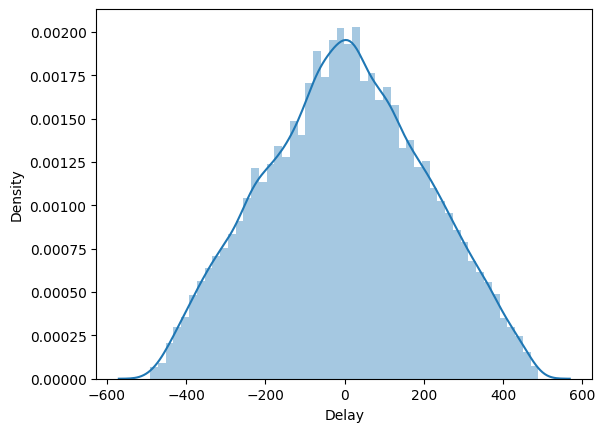

In [394]:
# checking the skewnwss of y_train

sns.distplot(y_train)

The data can be seen as kindof normally distributed

<Axes: ylabel='total_open_amount'>

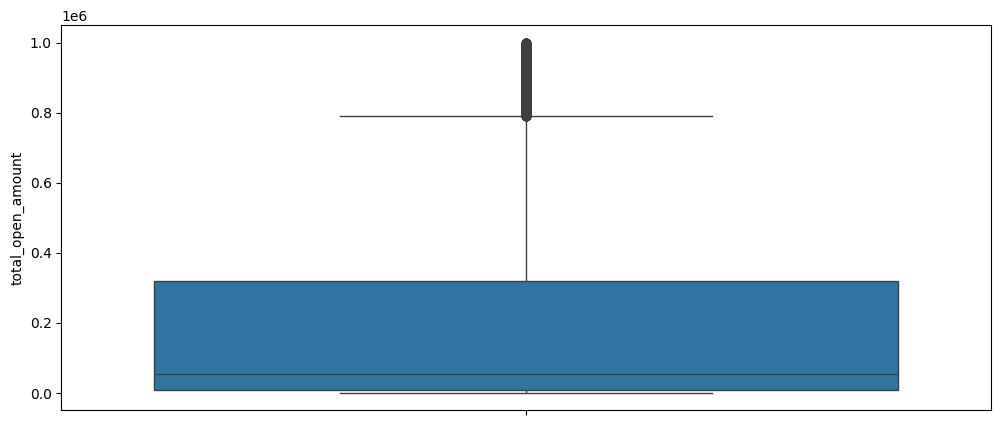

In [395]:
# boxplot for checking the outliers in total_open_amount

plt.figure(figsize=(12, 5))
sns.boxplot(x_train.total_open_amount)

<Axes: xlabel='Delay', ylabel='total_open_amount'>

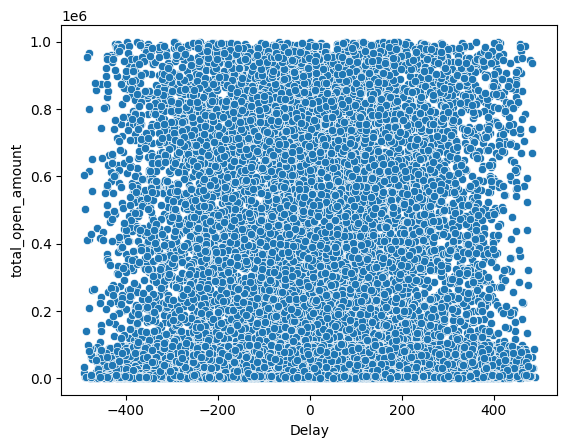

In [396]:
''' for checking the relationship between
 total open amount and delay by merging the datasets'''

sns.scatterplot(data = x_train.merge(y_train, on=x_train.index), x='Delay', y='total_open_amount')

### Outlier Treatment

In [397]:
# checking the skewness cvalue of total open amount

print(x_train['total_open_amount'].skew())

1.4111789151542815


In [398]:
# defining the range as 0.05-0.95

print(x_train['total_open_amount'].quantile(0.05))
print(x_train['total_open_amount'].quantile(0.95))

2372.8685
862675.6794999999


In [399]:
# taking only those values ahich are lying in the above said range

x_train['total_open_amount'] = np.where(x_train['total_open_amount']<2372.8685, 86806.11499999999, x_train['total_open_amount'])
x_train['total_open_amount'] = np.where(x_train['total_open_amount']>86806.11499999999, 2372.8685, x_train['total_open_amount'])
print(x_train['total_open_amount'].skew())

1.3512986724299811


<Axes: ylabel='total_open_amount'>

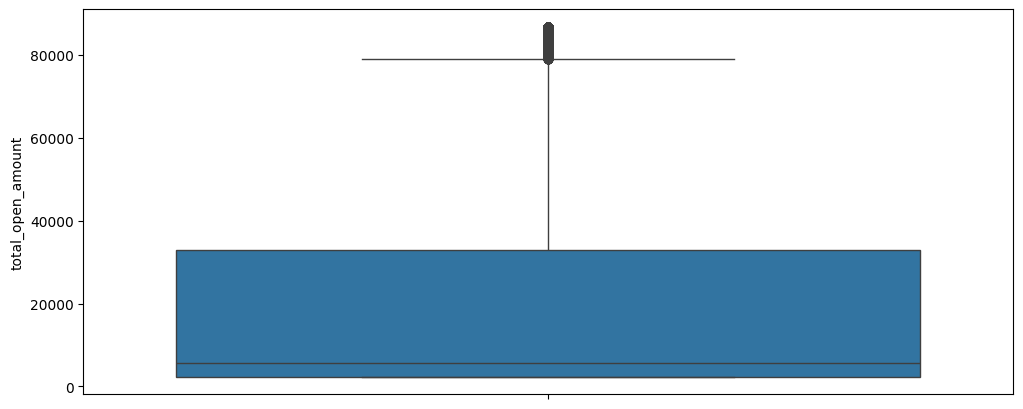

In [400]:
# again checking

plt.figure(figsize=(12, 5))
sns.boxplot(x_train.total_open_amount)

### Feature Engineering

In [401]:
# checking information of the train dataset

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         26250 non-null  object        
 1   cust_number           26250 non-null  object        
 2   name_customer         26250 non-null  object        
 3   clear_date            26250 non-null  datetime64[ns]
 4   business_year         26250 non-null  object        
 5   doc_id                26250 non-null  object        
 6   posting_date          26250 non-null  datetime64[ns]
 7   document_create_date  26250 non-null  datetime64[ns]
 8   due_in_date           26250 non-null  datetime64[ns]
 9   invoice_currency      26250 non-null  object        
 10  total_open_amount     26250 non-null  object        
 11  baseline_create_date  26250 non-null  datetime64[ns]
 12  cust_payment_terms    26250 non-null  object        
dtypes: datetime64[ns](

In [402]:
# label encoding encoding business code

business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_encoder.transform(x_train['business_code'])

In [403]:
x_val['business_code_enc'] = business_code_encoder.transform(x_val['business_code'])

In [404]:
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])

In [405]:
# function to drop a column from test, train and val set

def drop_a_col(col, train = x_train, val = x_val, test = x_test):
  train.drop(col, axis=1, inplace = True)
  val.drop(col, axis=1, inplace = True)
  test.drop(col, axis=1, inplace = True)
  return train, val, test

In [406]:
# function to display the information of the sets

def info_of_set(train = x_train, val = x_val, test = x_test):
  print(x_train.info())
  print(x_val.info())
  print(x_test.info())
  print("NOW COMES THE SHAPE")
  print(x_train.shape, x_val.shape, x_test.shape)

In [407]:
# dropping the business code

x_train, x_val, x_test = drop_a_col(['business_code'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           26250 non-null  object        
 1   name_customer         26250 non-null  object        
 2   clear_date            26250 non-null  datetime64[ns]
 3   business_year         26250 non-null  object        
 4   doc_id                26250 non-null  object        
 5   posting_date          26250 non-null  datetime64[ns]
 6   document_create_date  26250 non-null  datetime64[ns]
 7   due_in_date           26250 non-null  datetime64[ns]
 8   invoice_currency      26250 non-null  object        
 9   total_open_amount     26250 non-null  object        
 10  baseline_create_date  26250 non-null  datetime64[ns]
 11  cust_payment_terms    26250 non-null  object        
 12  business_code_enc     26250 non-null  int64         
dtypes: datetime64[ns](

In [408]:
# label encoding customer number

cust_num_encoder = LabelEncoder()
cust_num_encoder.fit(x_train['cust_number'])
x_train['cust_number_enc'] = cust_num_encoder.transform(x_train['cust_number'])

In [409]:
# appending the new classes to the feature itself

t1 = set(x_val['cust_number'])-set(cust_num_encoder.classes_)
for x in t1:
  cust_num_encoder.classes_= np.append(cust_num_encoder.classes_,x)

x_val['cust_number_enc'] = cust_num_encoder.transform(x_val['cust_number'])

In [410]:
t2 = set(x_test['cust_number'])-set(cust_num_encoder.classes_)
for x in t2:
  cust_num_encoder.classes_= np.append(cust_num_encoder.classes_,x)

x_test['cust_number_enc'] = cust_num_encoder.transform(x_test['cust_number'])

In [411]:
# dropping customer number

x_train, x_val, x_test = drop_a_col(['cust_number'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name_customer         26250 non-null  object        
 1   clear_date            26250 non-null  datetime64[ns]
 2   business_year         26250 non-null  object        
 3   doc_id                26250 non-null  object        
 4   posting_date          26250 non-null  datetime64[ns]
 5   document_create_date  26250 non-null  datetime64[ns]
 6   due_in_date           26250 non-null  datetime64[ns]
 7   invoice_currency      26250 non-null  object        
 8   total_open_amount     26250 non-null  object        
 9   baseline_create_date  26250 non-null  datetime64[ns]
 10  cust_payment_terms    26250 non-null  object        
 11  business_code_enc     26250 non-null  int64         
 12  cust_number_enc       26250 non-null  int64         
dtypes: datetime64[ns](

In [412]:
# dropping the customer name feature
# because it has many unique values
# not necesaary because customer number is also present

x_train, x_val, x_test = drop_a_col(['name_customer'])

In [413]:
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            26250 non-null  datetime64[ns]
 1   business_year         26250 non-null  object        
 2   doc_id                26250 non-null  object        
 3   posting_date          26250 non-null  datetime64[ns]
 4   document_create_date  26250 non-null  datetime64[ns]
 5   due_in_date           26250 non-null  datetime64[ns]
 6   invoice_currency      26250 non-null  object        
 7   total_open_amount     26250 non-null  object        
 8   baseline_create_date  26250 non-null  datetime64[ns]
 9   cust_payment_terms    26250 non-null  object        
 10  business_code_enc     26250 non-null  int64         
 11  cust_number_enc       26250 non-null  int64         
dtypes: datetime64[ns](5), int64(2), object(5)
memory usage: 2.6+ MB
None
<class 

In [414]:
# dropping the business year feature
# because it is constant in train and val set

x_train, x_val, x_test = drop_a_col(['business_year'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            26250 non-null  datetime64[ns]
 1   doc_id                26250 non-null  object        
 2   posting_date          26250 non-null  datetime64[ns]
 3   document_create_date  26250 non-null  datetime64[ns]
 4   due_in_date           26250 non-null  datetime64[ns]
 5   invoice_currency      26250 non-null  object        
 6   total_open_amount     26250 non-null  object        
 7   baseline_create_date  26250 non-null  datetime64[ns]
 8   cust_payment_terms    26250 non-null  object        
 9   business_code_enc     26250 non-null  int64         
 10  cust_number_enc       26250 non-null  int64         
dtypes: datetime64[ns](5), int64(2), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6752 t

In [415]:
# converting document id to int as it can't be encoded
# because it has 27000+ unqiue values

x_train['doc_id'] = x_train['doc_id'].astype(int)
x_val['doc_id'] = x_val['doc_id'].astype(int)
x_test['doc_id'] = x_test['doc_id'].astype(int)

In [416]:
# label encoding invoice currency

inv_curr_encoder = LabelEncoder()
inv_curr_encoder.fit(x_train['invoice_currency'])
x_train['invoice_currency_enc'] = inv_curr_encoder.transform(x_train['invoice_currency'])

In [417]:
# applying same in test and validation set

x_val['invoice_currency_enc'] = inv_curr_encoder.transform(x_val['invoice_currency'])
x_test['invoice_currency_enc'] = inv_curr_encoder.transform(x_test['invoice_currency'])

In [418]:
x_train, x_val, x_test = drop_a_col(['invoice_currency'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            26250 non-null  datetime64[ns]
 1   doc_id                26250 non-null  int64         
 2   posting_date          26250 non-null  datetime64[ns]
 3   document_create_date  26250 non-null  datetime64[ns]
 4   due_in_date           26250 non-null  datetime64[ns]
 5   total_open_amount     26250 non-null  object        
 6   baseline_create_date  26250 non-null  datetime64[ns]
 7   cust_payment_terms    26250 non-null  object        
 8   business_code_enc     26250 non-null  int64         
 9   cust_number_enc       26250 non-null  int64         
 10  invoice_currency_enc  26250 non-null  int64         
dtypes: datetime64[ns](5), int64(4), object(2)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6752 t

In [419]:
# label encoding customer payment terms as it is a categortical varaiable

pay_term_encoder = LabelEncoder()
pay_term_encoder.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc'] = pay_term_encoder.transform(x_train['cust_payment_terms'])

In [420]:
# appending the newly added values if present in test and validation set

t3 = set(x_val['cust_payment_terms'])-set(pay_term_encoder.classes_)
for x in t3:
  pay_term_encoder.classes_= np.append(pay_term_encoder.classes_,x)

x_val['cust_payment_terms_enc'] = pay_term_encoder.transform(x_val['cust_payment_terms'])

In [421]:
t4 = set(x_test['cust_payment_terms'])-set(pay_term_encoder.classes_)
for x in t4:
  pay_term_encoder.classes_= np.append(pay_term_encoder.classes_,x)

x_test['cust_payment_terms_enc'] = pay_term_encoder.transform(x_test['cust_payment_terms'])

In [422]:
x_train, x_val, x_test = drop_a_col(['cust_payment_terms'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              26250 non-null  datetime64[ns]
 1   doc_id                  26250 non-null  int64         
 2   posting_date            26250 non-null  datetime64[ns]
 3   document_create_date    26250 non-null  datetime64[ns]
 4   due_in_date             26250 non-null  datetime64[ns]
 5   total_open_amount       26250 non-null  object        
 6   baseline_create_date    26250 non-null  datetime64[ns]
 7   business_code_enc       26250 non-null  int64         
 8   cust_number_enc         26250 non-null  int64         
 9   invoice_currency_enc    26250 non-null  int64         
 10  cust_payment_terms_enc  26250 non-null  int64         
dtypes: datetime64[ns](5), int64(5), object(1)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
I

In [423]:
# converting total open amount to float, as it can't be encoded
# because it has 22000+ unqiue values

x_train['total_open_amount'] = x_train['total_open_amount'].astype(float)
x_val['total_open_amount'] = x_val['total_open_amount'].astype(float)
x_test['total_open_amount'] = x_test['total_open_amount'].astype(float)

## Extracting features from datetime values

In [424]:
# from the clear date

# extracting the day

x_train['cd_day'] = x_train['clear_date'].dt.day
x_val['cd_day'] = x_val['clear_date'].dt.day
x_test['cd_day'] = x_test['clear_date'].dt.day

# extracting the month

x_train['cd_month'] = x_train['clear_date'].dt.month
x_val['cd_month'] = x_val['clear_date'].dt.month
x_test['cd_month'] = x_test['clear_date'].dt.month

# extracting the year

x_train['cd_year'] = x_train['clear_date'].dt.year
x_val['cd_year'] = x_val['clear_date'].dt.year
x_test['cd_year'] = x_test['clear_date'].dt.year

In [425]:
# dropping clear date

x_train, x_val, x_test = drop_a_col(['clear_date'])
info_of_set()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doc_id                  26250 non-null  int64         
 1   posting_date            26250 non-null  datetime64[ns]
 2   document_create_date    26250 non-null  datetime64[ns]
 3   due_in_date             26250 non-null  datetime64[ns]
 4   total_open_amount       26250 non-null  float64       
 5   baseline_create_date    26250 non-null  datetime64[ns]
 6   business_code_enc       26250 non-null  int64         
 7   cust_number_enc         26250 non-null  int64         
 8   invoice_currency_enc    26250 non-null  int64         
 9   cust_payment_terms_enc  26250 non-null  int64         
 10  cd_day                  26250 non-null  int32         
 11  cd_month                26250 non-null  int32         
 12  cd_year                 26250 non-null  int32   

In [426]:
# from the posting date

# extracting the day

x_train['pd_day'] = x_train['posting_date'].dt.day
x_val['pd_day'] = x_val['posting_date'].dt.day
x_test['pd_day'] = x_test['posting_date'].dt.day

# extracting the month

x_train['pd_month'] = x_train['posting_date'].dt.month
x_val['pd_month'] = x_val['posting_date'].dt.month
x_test['pd_month'] = x_test['posting_date'].dt.month

# extracting the year

x_train['pd_year'] = x_train['posting_date'].dt.year
x_val['pd_year'] = x_val['posting_date'].dt.year
x_test['pd_year'] = x_test['posting_date'].dt.year

In [427]:
# dropping the posting date

x_train, x_val, x_test = drop_a_col(['posting_date'])

In [428]:
# from the document create date

# extracting the day

x_train['dcd_day'] = x_train['document_create_date'].dt.day
x_val['dcd_day'] = x_val['document_create_date'].dt.day
x_test['dcd_day'] = x_test['document_create_date'].dt.day

# extracting the month

x_train['dcd_month'] = x_train['document_create_date'].dt.month
x_val['dcd_month'] = x_val['document_create_date'].dt.month
x_test['dcd_month'] = x_test['document_create_date'].dt.month

# extracting the year

x_train['dcd_year'] = x_train['document_create_date'].dt.year
x_val['dcd_year'] = x_val['document_create_date'].dt.year
x_test['dcd_year'] = x_test['document_create_date'].dt.year

In [429]:
# dropping document create date

x_train, x_val, x_test = drop_a_col(['document_create_date'])

In [430]:
# from the due in date

# extracting the day

x_train['did_day'] = x_train['due_in_date'].dt.day
x_val['did_day'] = x_val['due_in_date'].dt.day
x_test['did_day'] = x_test['due_in_date'].dt.day

# extracting the month

x_train['did_month'] = x_train['due_in_date'].dt.month
x_val['did_month'] = x_val['due_in_date'].dt.month
x_test['did_month'] = x_test['due_in_date'].dt.month

# extracting the year

x_train['did_year'] = x_train['due_in_date'].dt.year
x_val['did_year'] = x_val['due_in_date'].dt.year
x_test['did_year'] = x_test['due_in_date'].dt.year

In [431]:
# dropping due in date

x_train, x_val, x_test = drop_a_col(['due_in_date'])

In [432]:
# from the baseline create date

# extracting the day

x_train['bcd_day'] = x_train['baseline_create_date'].dt.day
x_val['bcd_day'] = x_val['baseline_create_date'].dt.day
x_test['bcd_day'] = x_test['baseline_create_date'].dt.day

# extracting the month

x_train['bcd_month'] = x_train['baseline_create_date'].dt.month
x_val['bcd_month'] = x_val['baseline_create_date'].dt.month
x_test['bcd_month'] = x_test['baseline_create_date'].dt.month

# extracting the year

x_train['bcd_year'] = x_train['baseline_create_date'].dt.year
x_val['bcd_year'] = x_val['baseline_create_date'].dt.year
x_test['bcd_year'] = x_test['baseline_create_date'].dt.year

In [433]:
# dropping baseline create date

x_train, x_val, x_test = drop_a_col(['baseline_create_date'])

In [434]:
x_train, x_val, x_test

(          doc_id  total_open_amount  business_code_enc  cust_number_enc  \
 15745  193444697          2372.8685                  1            12807   
 3238   195924372          5995.0800                  4            20161   
 7444   199458912          2372.8685                  3             7599   
 46638  194802972          2372.8685                  1            16254   
 18226  195213972          2372.8685                  0            19125   
 ...          ...                ...                ...              ...   
 5846   196678527         21367.1200                  0            15441   
 33593  198293695          2615.6200                  1            18210   
 27098  199452377          2372.8685                  2            17837   
 49148  196466938         86806.1150                  1             7490   
 3445   190213329          2372.8685                  3             3277   
 
        invoice_currency_enc  cust_payment_terms_enc  cd_day  cd_month  \
 15745      

# Feature Selection

<Axes: >

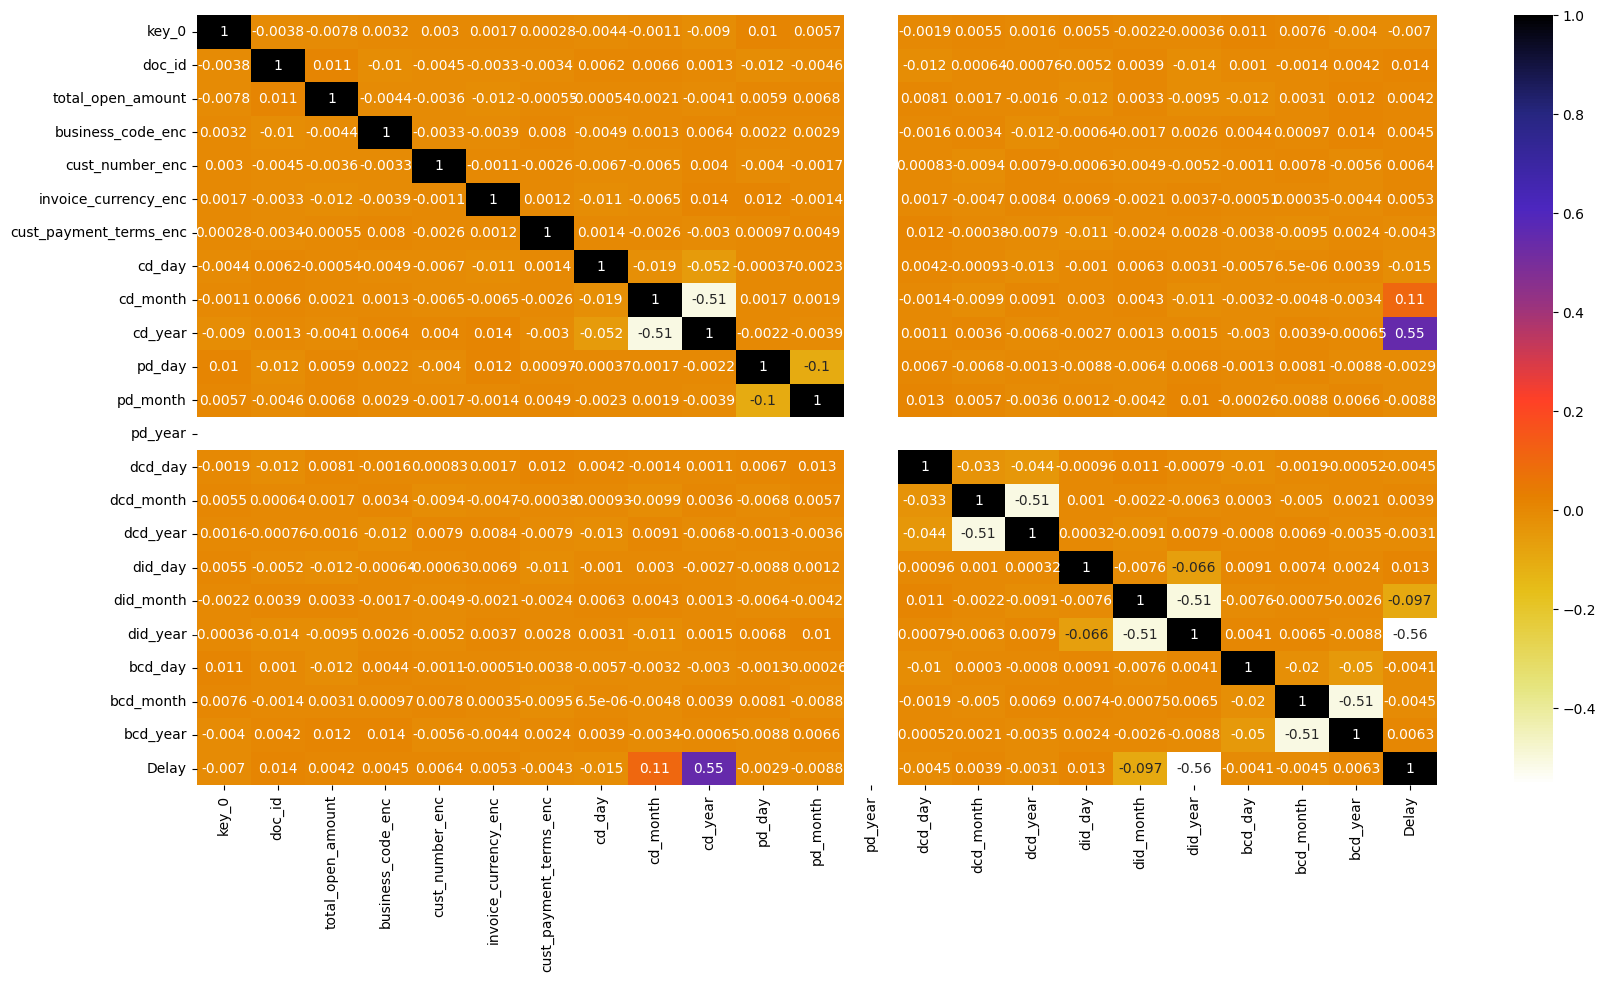

In [435]:
# plotting the heatmap contaiing correlations

plt.figure(figsize=(20, 10))
sns.heatmap(x_train.merge(y_train, on=x_train.index).corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [436]:
# dropped because it has 1 correlation

x_train, x_val, x_test = drop_a_col(['cd_year'])

In [437]:
# function to find the features having correlation greater than a threshold value

def corr_count(d_set, threshold):
  col_corr = set()
  corr_matrix = d_set.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i, j])>threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [438]:
# threshold is 0.70 in this case

corr_f = corr_count(x_train, 0.70)
len(set(corr_f))

0

In [439]:
# printing those features

corr_f

set()

In [440]:
# dropping all those features with high correlation values

m_col_train = x_train.drop(['bcd_day',
 'bcd_month',
 'bcd_year',
 'dcd_day',
 'dcd_month',
 'dcd_year',
 'did_month',
 'invoice_currency_enc',
 'pd_month',
 'cd_day',
 'cd_month'], axis=1)
m_col_val = x_val.drop(['bcd_day',
 'bcd_month',
 'bcd_year',
 'dcd_day',
 'dcd_month',
 'dcd_year',
 'did_month',
 'invoice_currency_enc',
 'pd_month',
 'cd_day',
 'cd_month'], axis=1)
m_col_test = x_test.drop(['bcd_day',
 'bcd_month',
 'bcd_year',
 'dcd_day',
 'dcd_month',
 'dcd_year',
 'did_month',
 'invoice_currency_enc',
 'pd_month',
 'cd_day',
 'cd_month'], axis=1)

In [441]:
m_col_train.shape, m_col_test.shape, m_col_val.shape

((26250, 9), (5625, 9), (5625, 9))

### Scaling using Min-Max Scaler

In [442]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train_c = s.fit_transform(m_col_train)
x_val_c = s.transform(m_col_val)
x_test_c = s.transform(m_col_test)

# Model Building

In [443]:
# creating list for storing the values

MSE_Score = []
R2_Score = []

### Linear Regression

In [444]:
# defining and fitting the model on x_train and y_train

m1 = LinearRegression()
m1.fit(m_col_train, y_train)

LinearRegression()

In [445]:
# predicting on validation set

y_pred1 = m1.predict(m_col_val)

In [446]:
# calculating the mse for validation set

mean_squared_error(y_val, y_pred1, squared=False)

168.22099927838954

In [447]:
# calculating the r2 for validation set

r2_score(y_val, y_pred1)

0.3093180067472695

In [448]:
# predicting on test set
# calculating mse and r2 for test set also

y_predict_test1 = m1.predict(m_col_test)
MSE_Score.append(mean_squared_error(y_test, y_predict_test1, squared=False))

In [449]:
R2_Score.append(r2_score(y_test, y_predict_test1))

## Support Vector regressor

In [450]:
# fiiting the model

m2 = SVR(kernel='rbf')
m2.fit(m_col_train, y_train)

SVR()

In [451]:
# predicitng on validation set

y_pred_t1 = m2.predict(m_col_val)

In [452]:
# caluculating the mse and r2 score for validation set

mean_squared_error(y_val, y_pred_t1, squared=False)

202.41471911807065

In [453]:
r2_score(y_val, y_pred_t1)

-4.368217778383254e-06

In [454]:
# predicting on test set
# calculating the mse and r2 on test set

y_predict_test2 = m2.predict(m_col_test)
MSE_Score.append(mean_squared_error(y_test, y_predict_test2, squared=False))

In [455]:
R2_Score.append(r2_score(y_test, y_predict_test2))

### Decision Tree

In [456]:
# fitting the model

m3 = DecisionTreeRegressor(random_state=0 , max_depth=5)
m3.fit(m_col_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [457]:
# predicting on validation set
y_pred_t2 = m3.predict(m_col_val)

In [458]:
# predicting the mse and r2 for validation set

mean_squared_error(y_val, y_pred_t2, squared=False)

168.4823724648431

In [459]:
r2_score(y_val, y_pred_t2)

0.30717004662315117

In [460]:
# predicting on the test dataset
# calculating the mse and r2 for the test set

y_predict_test3 = m3.predict(m_col_test)
MSE_Score.append(mean_squared_error(y_test, y_predict_test3, squared=False))

In [461]:
R2_Score.append(r2_score(y_test, y_predict_test3))

### Random Forest

In [462]:
# fitting the model

m4 = RandomForestRegressor(max_depth=10) # done manual hyperparameter tuning
m4.fit(m_col_train, y_train)

RandomForestRegressor(max_depth=10)

In [463]:
# predicitng on validation set

y_pred_t3 = m4.predict(m_col_val)

In [464]:
# calculating the mse adn r2 for validation set

mean_squared_error(y_val, y_pred_t3, squared=False)

170.3297468023869

In [465]:
r2_score(y_val, y_pred_t3)

0.29189327593393666

In [466]:
# predicting on test set
# calculating the mse and r2 for test set

y_predict_test3 = m4.predict(m_col_test)

In [467]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test3, squared=False))

In [468]:
R2_Score.append(r2_score(y_test, y_predict_test3))

### XGBoost Regressor


In [469]:
# fitting the model

m5 = xgb.XGBRegressor()
m5.fit(m_col_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [470]:
# predicitng on validation set

y_pred_t4 = m5.predict(m_col_val)

In [471]:
# calculating the mse and r2 for the validation set

mean_squared_error(y_val, y_pred_t4, squared=False)

184.1429362068641

In [472]:
r2_score(y_val, y_pred_t4)

0.17238597003989298

In [473]:
# predicting on the test set
# calculating the mse and r2 for the test set

y_predict_test4 = m5.predict(m_col_test)

In [474]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test4, squared=False))

In [475]:
R2_Score.append(r2_score(y_test, y_predict_test4))

### Comparison Report b/w the models

In [476]:
# creating a dataframe with the models and their mse and r2 scores

Models = ['Linear Regression', 'Suport Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoostRegressor']
comp_of_models = pd.DataFrame(list(zip(Models, MSE_Score, R2_Score)), columns = ['Models', 'MSE_Score', 'R2_Score'])

In [477]:
comp_of_models

,Models,MSE_Score,R2_Score
0,Linear Regression,168.913992,0.299143
1,Suport Vector Regressor,201.768558,-0.000012
2,Decision Tree Regressor,169.500077,0.294271
3,Random Forest Regressor,171.215813,0.279912
4,XGBoostRegressor,185.498842,0.154759


# Predicting on the final test data

In [478]:
m_test.shape

(12500, 19)

In [479]:
m_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 3 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           12500 non-null  object        
 1   cust_number             12500 non-null  int64         
 2   name_customer           12500 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   business_year           12500 non-null  float64       
 5   doc_id                  12500 non-null  float64       
 6   posting_date            12500 non-null  datetime64[ns]
 7   document_create_date    12500 non-null  datetime64[ns]
 8   document_create_date.1  12500 non-null  datetime64[ns]
 9   due_in_date             12500 non-null  datetime64[ns]
 10  invoice_currency        12500 non-null  object        
 11  document type           12500 non-null  object        
 12  posting_id              12500 non-null  float64    

In [480]:
# checking the null values

m_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                12500
business_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
Delay                     12500
dtype: int64

In [481]:
# checking the unique values

m_test.nunique()

business_code                 6
cust_number               11773
name_customer                50
clear_date                    0
business_year                 2
doc_id                    12492
posting_date                494
document_create_date        494
document_create_date.1      494
due_in_date                 494
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         12490
baseline_create_date        494
cust_payment_terms           69
invoice_id                12492
isOpen                        2
Delay                         0
dtype: int64

In [482]:
# dropping delay because it is the target column

m_test.drop(['Delay'], axis=1, inplace=True)

In [483]:
# dropping these columns to aintai dimensionality with the train data

x_main_test = m_test.drop(labels = ['clear_date','document type','posting_id','isOpen','business_year','document_create_date.1','invoice_id','invoice_currency'], axis=1)

## Feature Engineering

In [484]:
# transforming business code

temp1 = set(x_main_test['business_code'])-set(business_code_encoder.classes_)
for x in temp1:
    business_code_encoder.classes_= np.append(business_code_encoder.classes_,x)

x_main_test['business_code_enc'] = business_code_encoder.transform(x_main_test['business_code'])

In [485]:
# transforming customer number
temp2 = set(x_main_test['cust_number'])-set(cust_num_encoder.classes_)
for x in temp2:
    cust_num_encoder.classes_= np.append(cust_num_encoder.classes_,x)

x_main_test['cust_number_enc'] = cust_num_encoder.transform(x_main_test['cust_number'])

In [486]:
# changing dtype from object to int as these cant be encoded

x_main_test['doc_id'] = x_main_test.doc_id.astype(int)
x_main_test['total_open_amount'] = x_main_test.total_open_amount.astype(float)

In [487]:
# transforming customer payment terms

temp3 = set(x_main_test['cust_payment_terms'])-set(pay_term_encoder.classes_)
for x in temp3:
  pay_term_encoder.classes_= np.append(pay_term_encoder.classes_,x)

x_main_test['cust_payment_terms_enc'] = pay_term_encoder.transform(x_main_test['cust_payment_terms'])

## Datetime conversion for all the Object dates

In [488]:
x_main_test['pd_day'] = x_main_test['posting_date'].dt.day
x_main_test['pd_month'] = x_main_test['posting_date'].dt.month
x_main_test['pd_year'] = x_main_test['posting_date'].dt.year

x_main_test['dcd_day'] = x_main_test['document_create_date'].dt.day
x_main_test['dcd_month'] = x_main_test['document_create_date'].dt.month
x_main_test['dcd_year'] = x_main_test['document_create_date'].dt.year

x_main_test['did_day'] = x_main_test['due_in_date'].dt.day
x_main_test['did_month'] = x_main_test['due_in_date'].dt.month
x_main_test['did_year'] = x_main_test['due_in_date'].dt.year

x_main_test['bcd_day'] = x_main_test['baseline_create_date'].dt.day
x_main_test['bcd_month'] = x_main_test['baseline_create_date'].dt.month
x_main_test['bcd_year'] = x_main_test['baseline_create_date'].dt.year

In [489]:
# dropping all the unnecessary features

x_main_test.drop(['business_code','cust_number','name_customer','posting_date','document_create_date','due_in_date','baseline_create_date','cust_payment_terms','pd_month','dcd_day','dcd_month','dcd_year','did_month','bcd_day','bcd_month','bcd_year'], axis=1, inplace=True)

In [490]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 3 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  12500 non-null  int64  
 1   total_open_amount       12500 non-null  float64
 2   business_code_enc       12500 non-null  int64  
 3   cust_number_enc         12500 non-null  int64  
 4   cust_payment_terms_enc  12500 non-null  int64  
 5   pd_day                  12500 non-null  int32  
 6   pd_year                 12500 non-null  int32  
 7   did_day                 12500 non-null  int32  
 8   did_year                12500 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 781.2 KB


## Prediction

In [491]:
m_col_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26250 entries, 15745 to 3445
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  26250 non-null  int64  
 1   total_open_amount       26250 non-null  float64
 2   business_code_enc       26250 non-null  int64  
 3   cust_number_enc         26250 non-null  int64  
 4   cust_payment_terms_enc  26250 non-null  int64  
 5   pd_day                  26250 non-null  int32  
 6   pd_year                 26250 non-null  int32  
 7   did_day                 26250 non-null  int32  
 8   did_year                26250 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 1.6 MB


In [492]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 3 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  12500 non-null  int64  
 1   total_open_amount       12500 non-null  float64
 2   business_code_enc       12500 non-null  int64  
 3   cust_number_enc         12500 non-null  int64  
 4   cust_payment_terms_enc  12500 non-null  int64  
 5   pd_day                  12500 non-null  int32  
 6   pd_year                 12500 non-null  int32  
 7   did_day                 12500 non-null  int32  
 8   did_year                12500 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 781.2 KB


In [493]:
# predicting on main test set

final = m5.predict(x_main_test)

In [494]:
# coverting the predicted dealy to series

final = pd.Series(final,name='Delay')

In [495]:
# merging the original dataset with the predicted one

res = m_test.merge(final, on = x_main_test.index )
res

,key_0,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,3,U007,20001083,Elite Systems Group,NaT,2020.0,194305136.0,2020-02-02,2019-07-23,2019-05-11,2020-01-21,CAD,RV,1.0,7036.14,2019-05-02,1/90 EOM,194305136.0,0,-132.580276
1,7,U013,20060570,NextGen Solutions,NaT,2020.0,192694524.0,2020-02-07,2019-12-29,2019-06-02,2019-09-22,CAD,RV,1.0,82825.94,2019-01-23,Escrow,192694524.0,1,97.846260
2,11,U013,20092074,Dynamic Industries,NaT,2020.0,199818919.0,2020-03-01,2020-01-13,2020-04-29,2019-07-07,USD,RV,1.0,97372.28,2019-05-23,90 EOM,199818919.0,1,104.042480
3,15,U001,20086656,InnovaTech Group,NaT,2020.0,199822949.0,2019-10-14,2019-10-24,2019-05-21,2019-11-04,CAD,RV,1.0,99161.55,2019-09-28,1/15 Prox,199822949.0,0,-39.117645
4,19,U002,20094434,Nexus Networks,NaT,2019.0,190369171.0,2019-03-03,2019-11-14,2020-02-25,2020-05-15,USD,RV,1.0,7234.61,2020-05-14,Rental,190369171.0,1,-89.451691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,49983,U007,20076972,Spectrum Technologies,NaT,2019.0,194875124.0,2019-06-07,2019-12-29,2020-04-15,2020-05-06,CAD,RV,1.0,28841.26,2020-01-26,PPD,194875124.0,0,-267.731354
12496,49987,U007,20097292,Echelon Industries,NaT,2020.0,195083197.0,2020-04-16,2019-06-16,2019-08-09,2019-08-25,CAD,RV,1.0,227477.12,2019-04-02,Net 7,195083197.0,0,21.910440
12497,49991,U002,20048009,Pioneer Industries,NaT,2020.0,198171059.0,2019-01-14,2019-09-21,2020-02-18,2019-01-20,CAD,RV,1.0,2651.78,2019-09-24,Disposable,198171059.0,0,56.017624
12498,49995,U007,20069131,Nexus Networks,NaT,2020.0,190916046.0,2019-08-02,2019-03-06,2019-02-07,2020-05-08,CAD,RV,1.0,9772.48,2020-05-14,1/15 EOM,190916046.0,0,-223.357422


In [496]:
# converting delay to integer value

res['Delay'] = res.Delay.astype(int)

# Calculating the Predicted Payment Date

In [497]:
# calculating the clear date

res['clear_date'] = res['due_in_date']+res['Delay'].map(dt.timedelta)

# renaming it to predicted payment date

res.rename(columns={"clear_date": "Predicted_payment_date"}, inplace=True)

In [498]:
res

,key_0,business_code,cust_number,name_customer,Predicted_payment_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,3,U007,20001083,Elite Systems Group,2019-09-11,2020.0,194305136.0,2020-02-02,2019-07-23,2019-05-11,2020-01-21,CAD,RV,1.0,7036.14,2019-05-02,1/90 EOM,194305136.0,0,-132
1,7,U013,20060570,NextGen Solutions,2019-12-28,2020.0,192694524.0,2020-02-07,2019-12-29,2019-06-02,2019-09-22,CAD,RV,1.0,82825.94,2019-01-23,Escrow,192694524.0,1,97
2,11,U013,20092074,Dynamic Industries,2019-10-19,2020.0,199818919.0,2020-03-01,2020-01-13,2020-04-29,2019-07-07,USD,RV,1.0,97372.28,2019-05-23,90 EOM,199818919.0,1,104
3,15,U001,20086656,InnovaTech Group,2019-09-26,2020.0,199822949.0,2019-10-14,2019-10-24,2019-05-21,2019-11-04,CAD,RV,1.0,99161.55,2019-09-28,1/15 Prox,199822949.0,0,-39
4,19,U002,20094434,Nexus Networks,2020-02-16,2019.0,190369171.0,2019-03-03,2019-11-14,2020-02-25,2020-05-15,USD,RV,1.0,7234.61,2020-05-14,Rental,190369171.0,1,-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,49983,U007,20076972,Spectrum Technologies,2019-08-13,2019.0,194875124.0,2019-06-07,2019-12-29,2020-04-15,2020-05-06,CAD,RV,1.0,28841.26,2020-01-26,PPD,194875124.0,0,-267
12496,49987,U007,20097292,Echelon Industries,2019-09-15,2020.0,195083197.0,2020-04-16,2019-06-16,2019-08-09,2019-08-25,CAD,RV,1.0,227477.12,2019-04-02,Net 7,195083197.0,0,21
12497,49991,U002,20048009,Pioneer Industries,2019-03-17,2020.0,198171059.0,2019-01-14,2019-09-21,2020-02-18,2019-01-20,CAD,RV,1.0,2651.78,2019-09-24,Disposable,198171059.0,0,56
12498,49995,U007,20069131,Nexus Networks,2019-09-28,2020.0,190916046.0,2019-08-02,2019-03-06,2019-02-07,2020-05-08,CAD,RV,1.0,9772.48,2020-05-14,1/15 EOM,190916046.0,0,-223


In [499]:
res.describe()

,key_0,cust_number,Predicted_payment_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,Delay
count,12500.000000,1.250000e+04,12500,12500.000000,1.250000e+04,12500,12500,12500,12500,12500.0,12500.000000,12500,1.250000e+04,12500.000000,12500.000000
mean,25001.000000,2.004999e+07,2019-08-28 22:25:39.072000256,2019.501520,1.950248e+08,2019-09-14 11:30:58.176000,2019-09-16 19:29:44.447999744,2019-09-14 19:15:06.624000,2019-09-12 00:07:36.192000256,1.0,207797.190006,2019-09-12 19:24:47.231999744,1.950248e+08,0.507520,-14.070800
min,3.000000,2.000000e+07,2018-06-27 00:00:00,2019.000000,1.900000e+08,2019-01-11 00:00:00,2019-01-11 00:00:00,2019-01-11 00:00:00,2019-01-11 00:00:00,1.0,1000.280000,2019-01-11 00:00:00,1.900000e+08,0.000000,-533.000000
25%,12502.000000,2.002504e+07,2019-06-09 00:00:00,2019.000000,1.924952e+08,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-14 00:00:00,2019-05-11 00:00:00,1.0,7789.742500,2019-05-10 00:00:00,1.924952e+08,0.000000,-118.000000
50%,25001.000000,2.004964e+07,2019-08-28 00:00:00,2020.000000,1.950164e+08,2019-09-15 00:00:00,2019-09-19 00:00:00,2019-09-17 00:00:00,2019-09-10 00:00:00,1.0,55760.930000,2019-09-11 00:00:00,1.950164e+08,1.000000,22.000000
75%,37500.000000,2.007501e+07,2019-11-17 00:00:00,2020.000000,1.975312e+08,2020-01-15 00:00:00,2020-01-20 00:00:00,2020-01-16 00:00:00,2020-01-14 00:00:00,1.0,328073.452500,2020-01-14 00:00:00,1.975312e+08,1.000000,83.000000
max,49999.000000,2.010000e+07,2020-11-22 00:00:00,2020.000000,1.999977e+08,2020-05-18 00:00:00,2020-05-18 00:00:00,2020-05-18 00:00:00,2020-05-18 00:00:00,1.0,999851.300000,2020-05-18 00:00:00,1.999977e+08,1.000000,446.000000
std,14434.334068,2.884457e+04,NaN,0.500018,2.899093e+06,NaN,NaN,NaN,NaN,0.0,292503.694147,NaN,2.899093e+06,0.499963,134.678835


# Bucketizing the delay

In [501]:
# function to categorize the values

def delay_bucket(x = res.Delay):
  if x<0: return 'no delay'
  elif x>=0 and  x<15: return '0 to 15 days of delay'
  elif x>=15 and x<30: return '15 to 30 days of delay'
  elif x>=30 and x<45: return '30 to 45 days of delay'
  elif x>=45 and x<60: return '45 to 60 days of delay'
  elif x>=60 and x<100: return '60 to 100 days of delay'
  elif x>100: return 'more than 100 days of delay'

In [502]:
# creating a new column containg the values

res['delay_bucket'] = res['Delay'].apply(lambda x: delay_bucket(x))

In [508]:
res.shape

(12500, 21)

In [510]:
# Converting to the .csv file

csv_path = '/content/drive/MyDrive/H2HBABBA2121/ML/predData.csv'
res.to_csv(csv_path, index=False)